In [1]:
#!pip install selenium
#!pip install webdriver_manager
from selenium import webdriver

import os
from selenium.webdriver.chrome.service import Service

from selenium.webdriver.support.ui import WebDriverWait

from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By

from bs4 import BeautifulSoup

import codecs
from selenium.webdriver.common.keys import Keys
import re

from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.support.ui import Select

In [121]:
website = 'https://www.imdb.com/search/title/?count=100&groups=top_1000&sort=user_rating'
driver = webdriver.Chrome()
driver.get(website)

In [122]:
next_page = driver.find_element(By.LINK_TEXT, 'Next »')
for x in driver.find_elements(By.XPATH,'//*[@id="main"]/div/div[4]/span[1]'):
    end = int(x.text.split(' ')[2].replace(',',''))
rang = []
film = []
jahr = []
fsk = []
dauer = []
genre = []
bewertung = []


while next_page:
    headers = driver.find_elements(By.TAG_NAME, 'h3')
    for head in headers:
        rang.append(head.text.split(' ')[0])
        jahr.append(head.text.split(' ')[-1])
        film.append(head.text.split(' ')[1:-1])
    rang = rang[:-1]
    jahr = jahr[:-1]
    film = film[:-1]
    genre_infos = driver.find_elements(By.XPATH, '//p[@class="text-muted "]')

    for genre_info in genre_infos:
        if len(genre_info.text.split('|')) == 3:
            fsk.append(genre_info.text.split('|')[0])
            dauer.append(genre_info.text.split('|')[1])
            genre.append(genre_info.text.split('|')[2])
        elif len(genre_info.text.split('|')) == 2:
            fsk.append('NaN')
            dauer.append(genre_info.text.split('|')[0])
            genre.append(genre_info.text.split('|')[1])
    ratings_bar =  driver.find_elements(By.CLASS_NAME, 'ratings-bar')
    
    for rating_bar in ratings_bar:
        bewertung.append(rating_bar.text.split(' ')[0])
    if len(rang)== end:
        break    
    next_page = driver.find_element(By.LINK_TEXT, 'Next »')
    next_page.click()

driver.quit()

# lists to dataframe
import pandas as pd
df = pd.DataFrame()
df['rang'] = rang
df['film'] = film
df['jahr'] = jahr
df['fsk'] = fsk
df['dauer'] = dauer
df['genre'] = genre
df['bewertung'] = bewertung
df

,rang,film,jahr,fsk,dauer,genre,bewertung
0,1.,"[Die, Verurteilten]",(1994),12,142 min,Drama,"9,3"
1,2.,"[Der, Pate]",(1972),16,175 min,"Crime, Drama","9,2"
2,3.,"[The, Dark, Knight]",(2008),16,152 min,"Action, Crime, Drama","9,0"
3,4.,"[Schindlers, Liste]",(1993),12,195 min,"Biography, Drama, History","9,0"
4,5.,"[Der, Herr, der, Ringe:, Die, Rückkehr, des, K...",(2003),12,201 min,"Action, Adventure, Drama","9,0"
...,...,...,...,...,...,...,...
995,996.,"[Schreckenshaus, des, Dr., Rasanoff]",(1960),NaN,90 min,"Drama, Horror","7,6"
996,997.,"[Shine, -, Der, Weg, ins, Licht]",(1996),12,105 min,"Biography, Drama, Music","7,6"
997,998.,[Control],(2007),12,122 min,"Biography, Drama, Music","7,6"
998,999.,"[Der, Unsichtbare]",(1933),16,71 min,"Horror, Sci-Fi","7,6"


In [173]:
df1 = df.copy()

In [145]:
df1

,rang,film,jahr,fsk,dauer,genre,bewertung
0,1.,"[Die, Verurteilten]",(1994),12,142 min,Drama,"9,3"
1,2.,"[Der, Pate]",(1972),16,175 min,"Crime, Drama","9,2"
2,3.,"[The, Dark, Knight]",(2008),16,152 min,"Action, Crime, Drama","9,0"
3,4.,"[Schindlers, Liste]",(1993),12,195 min,"Biography, Drama, History","9,0"
4,5.,"[Der, Herr, der, Ringe:, Die, Rückkehr, des, K...",(2003),12,201 min,"Action, Adventure, Drama","9,0"
...,...,...,...,...,...,...,...
995,996.,"[Schreckenshaus, des, Dr., Rasanoff]",(1960),NaN,90 min,"Drama, Horror","7,6"
996,997.,"[Shine, -, Der, Weg, ins, Licht]",(1996),12,105 min,"Biography, Drama, Music","7,6"
997,998.,[Control],(2007),12,122 min,"Biography, Drama, Music","7,6"
998,999.,"[Der, Unsichtbare]",(1933),16,71 min,"Horror, Sci-Fi","7,6"


In [174]:
df1.rang = df1.rang.str.replace('.','')
#from film remove the brackets and commas regex
df1.film = df1['film'].str.join(' ')
df1.jahr = df1.jahr.str[1:-1]
df1.dauer = df1.dauer.str.replace('min','')
df1

C:\Users\David Dedic\AppData\Local\Temp\ipykernel_20776\3578277660.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df1.rang = df1.rang.str.replace('.','')


,rang,film,jahr,fsk,dauer,genre,bewertung
0,1,Die Verurteilten,1994,12,142,Drama,"9,3"
1,2,Der Pate,1972,16,175,"Crime, Drama","9,2"
2,3,The Dark Knight,2008,16,152,"Action, Crime, Drama","9,0"
3,4,Schindlers Liste,1993,12,195,"Biography, Drama, History","9,0"
4,5,Der Herr der Ringe: Die Rückkehr des Königs,2003,12,201,"Action, Adventure, Drama","9,0"
...,...,...,...,...,...,...,...
995,996,Schreckenshaus des Dr. Rasanoff,1960,NaN,90,"Drama, Horror","7,6"
996,997,Shine - Der Weg ins Licht,1996,12,105,"Biography, Drama, Music","7,6"
997,998,Control,2007,12,122,"Biography, Drama, Music","7,6"
998,999,Der Unsichtbare,1933,16,71,"Horror, Sci-Fi","7,6"


In [176]:
# jahr as date
df1['jahr'] = pd.to_datetime(df1['jahr'], format='%Y')

# EDA

<AxesSubplot: xlabel='jahr', ylabel='bewertung'>

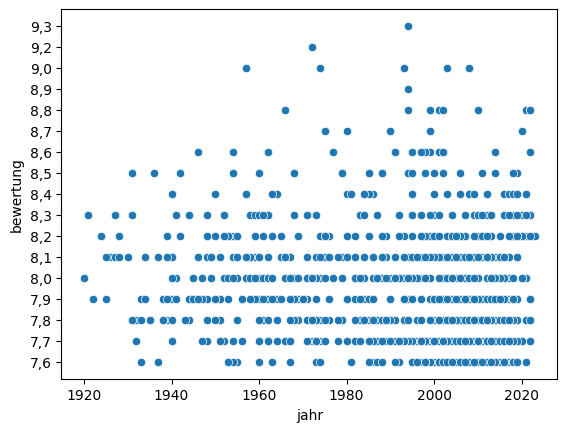

In [179]:
import seaborn as sns
#scatterplot jahr and bewertung
sns.scatterplot(data=df1, x="jahr", y="bewertung")

In [ ]:
driver.quit()